#  <span style="color:orange">Binary Classification Tutorial (CLF101) - Level Beginner</span>

**Created using: PyCaret 2.2** <br />
**Date Updated: November 11, 2020**

# 1.0 Tutorial Objective
이 튜토리얼에서는 PyCaret을 처음 접하고 `pycaret.classification` Module을 사용하여 Binary Classification을 시작하려고 한다고 가정합니다.

이 튜토리얼에서는 다음 내용을 학습합니다:  

* **데이터 가져오기:** PyCaret 저장소에서 데이터를 가져오는 방법
* **환경 설정:** PyCaret에서 실험을 설정하고 분류 모델을 구축하는 방법
* **모델 만들기:** 모델을 만들고, 계층화된 교차 검증을 수행하고, 분류 메트릭을 평가하는 방법
* **모델 튜닝:** 분류 모델의 하이퍼 파라미터를 자동으로 조정하는 방법
* **모델 플롯:** 다양한 플롯를 사용하여 모델 성능을 분석하는 방법
* **모델 완성:** 실험이 끝날 때 최적의 모델을 완성하는 방법
* **모형 예측:** 새 데이터/한번도 본적이 없는 데이터에 대해 예측하는 방법
* **모델 저장/로드:** 나중에 사용할 수 있도록 모델을 저장/로드하는 방법

# 1.0 Tutorial Objective
Welcome to the Binary Classification Tutorial (CLF101) - Level Beginner.   
This tutorial assumes that you are new to PyCaret and looking to get started with Binary Classification using the `pycaret.classification` Module.

In this tutorial we will learn:

* **Getting Data:**  How to import data from PyCaret repository
* **Setting up Environment:**  How to setup an experiment in PyCaret and get started with building classification models
* **Create Model:**  How to create a model, perform stratified cross validation and evaluate classification metrics
* **Tune Model:**  How to automatically tune the hyper-parameters of a classification model
* **Plot Model:**  How to analyze model performance using various plots
* **Finalize Model:** How to finalize the best model at the end of the experiment
* **Predict Model:**  How to make predictions on new / unseen data
* **Save / Load Model:**  How to save / load a model for future use

Read Time : Approx. 30 Minutes

## 1.1 Installing PyCaret
The first step to get started with PyCaret is to install pycaret. Installation is easy and will only take a few minutes. Follow the instructions below:

#### Installing PyCaret in Local Jupyter Notebook
`pip install pycaret`  <br />

#### Installing PyCaret on Google Colab or Azure Notebooks
`!pip install pycaret`


## 1.2 Pre-Requisites
- Python 3.6 or greater
- PyCaret 2.0 or greater
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Binary Classification

## 1.3 For Google colab users:
If you are running this notebook on Google colab, run the following code at top of your notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`


## 1.4 See also:
- __[Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__
- __[Binary Classification Tutorial (CLF103) - Expert Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)__

# 2.0 What is Binary Classification?
이진 분류는 합격/불합격, 긍정/부정, 기본값/비기본값 등과 같이 이산적이고 순서가 지정되지 않은 범주형 클래스 레이블을 예측하는 것이 목표인 지도 기계 학습 기법이다.   
분류를 위한 몇 가지 실제 사용 사례는 다음과 같다.:

- 환자가 특정 질병을 가지고 있는지 여부를 결정하기 위한 의학적 테스트 - 분류 특성은 질병의 존재 여부.
- 공장에서의 "합격 또는 불합격" 시험 방법 또는 품질 관리, 즉 규격이 충족되었는지 여부를 결정하는 - 합격/불합격 분류.
- 정보 검색, 즉 페이지나 기사가 검색의 결과 집합에 있어야 하는지 여부를 결정하는 것 - 분류 속성은 기사의 관련성 또는 사용자에 대한 유용성임.

__[Learn More about Binary Classification](https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16)__

# 2.0 What is Binary Classification?
Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Pass/Fail, Positive/Negative, Default/Not-Default etc. A few real world use cases for classification are listed below:

- Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease.
- A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
- Information retrieval, namely deciding whether a page or an article should be in the result set of a search or not – the classification property is the relevance of the article, or the usefulness to the user.

__[Learn More about Binary Classification](https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16)__

# 3.0 Overview of the Classification Module in PyCaret
PyCaret의 분류 모듈(pycaret.classification)은 다양한 기술과 알고리듬을 기반으로 요소를 이진 그룹으로 분류하는 데 사용되는 지도 기계학습 모듈이다. 
분류 문제의 일반적인 사용 사례로는 고객 채무불이행 예측(예 또는 아니오), 고객 이탈(고객 이탈 또는 잔류), 질병 발견(긍정 또는 부정) 등이 있습니다.

PyCaret 분류 모듈은 Binary 또는 Multi-class 분류 문제에 사용할 수 있습니다. 18개가 넘는 알고리즘과 14개의 플롯을 통해 모델의 성능을 분석합니다. 
하이퍼 파라미터 튜닝, 앙상블 또는 스태킹과 같은 고급 기술 중 어느 것이든 PyCaret의 분류 모듈은 모든 것을 갖추고 있습니다.  

3.0 Overview of the Classification Module in PyCaret  
PyCaret's classification module (`pycaret.classification`) is a supervised machine learning module which is used for classifying the elements into a binary group based on various techniques and algorithms. Some common use cases of classification problems include predicting customer default (yes or no), customer churn (customer will leave or stay), disease found (positive or negative).

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

# 4.0 Dataset for the Tutorial

### 신용카드 고객의 채무불이행 가능성 예측

**신용카드를 사용하는 고객들의 과거 데이터를 통해 앞르로 채무불이행을 할 가능성이 있는지 없는지를 예측하는 이진분류 문제입니다.**

- 종속(응답)변수 : 채무불이행여부(Yes=1, No=0), 이진분류 
- 독립(설명)변수 : 23개 변수 사용   
- 
- X1: 주어진 신용금액(NT달러): 개인소비자신용과 그 가족(보충)신용을 모두 포함한다.
- X2: 성별(1 = 남성, 2 = 여성).
- X3: 학력(1 = 대학원, 2 = 대학, 3 = 고등학교, 4 = 기타).
- X4: 결혼 상태(1 = 기혼, 2 = 독신, 3 = 기타).
- X5: 나이(년).
- X6 - X11: 과거 지불 내역. 우리는 지난 월별 지불 기록(2005년 4월부터 9월까지)을 다음과 같이 추적했습니다. X6 = 2005년 9월 상환 상태; X7 = 2005년 8월 상환 상태; . . .;X11 = 2005년 4월 상환 상태. 상환 상태에 대한 측정 척도는 다음과 같습니다. -1 = 적법하게 지불합니다. 1 = 한 달 동안 지불 지연; 2 = 2개월 동안 지불 지연; . . .; 8 = 8개월 동안 지불 지연; 9 = 9개월 이상 지불 지연.
- X12-X17: 청구서 금액(NT 달러). X12 = 2005년 9월 청구서 금액; X13 = 2005년 8월 청구서 금액; . . .; X17 = 2005년 4월 청구서 금액.
- X18-X23: 이전 지불 금액(NT 달러). X18 = 2005년 9월에 지불한 금액; X19 = 2005년 8월에 지불한 금액; . . .;X23 = 2005년 4월에 지불한 금액.

이 튜토리얼에서는 **Default of Credit Card Clients Dataset**이라고 하는 UCI의 데이터 세트를 사용할 것이다.   
이 데이터 세트는 2005년 4월부터 2005년 9월까지 타이완의 신용카드 고객의 채무불이행, 인구통계학적 요인, 신용 데이터, 결제 내역 및 청구서에 대한 정보를 포함하고 있다.   
24,000개의 샘플과 25개의 특징이 있습니다.   
각 열에 대한 간단한 설명은 다음과 같습니다.  

- ID: 각 클라이언트의 ID
- LIMIT_BAL: NT 달러로 표시된 신용 금액(개인 및 가족/추가 신용 포함)
- SEX: 성별(1=남성, 2=여)
- 학력: (1=고등학교, 2=대학교, 3=고등학교, 4=고등학교, 5=고등학교, 6=고등학교)
- 결혼: 결혼 여부(1=기혼, 2=싱글, 3=신혼)
- AGE: 나이(연령)
- PAY_0 ~ PAY_6 : n개월 전 까지 상환현황 (PAY_0 = 지난달 ... PAY_6 = 6개월 전) (라벨 : -1 = 정당하게 결제, 1 = 1개월 지연, 2 = 2개월 지연, ... 8 = 8개월 지연, 9개월 이상 결제 지연)
- BIL_AMT1 ~ BIL_AMT6 : n개월 전 계산서 금액 (BILL_AMT1 = last_month ) BIL_AMT6 = 6개월 전)
- PAY_AMT1 to PAY_AMT6: n개월 전 지급액(BILL_AMT1 = last_month.. BIL_AMT6 = 6개월 전)
- default: 기본 지급(1=예, 0=아니오), Target Column

For this tutorial we will use a dataset from UCI called **Default of Credit Card Clients Dataset**. This dataset contains information on default payments, demographic factors, credit data, payment history, and billing statements of credit card clients in Taiwan from April 2005 to September 2005. There are 24,000 samples and 25 features. Short descriptions of each column are as follows:

- **ID:** ID of each client
- **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX:** Gender (1=male, 2=female)
- **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
- **AGE:** Age in years
- **PAY_0 to PAY_6:** Repayment status by n months ago (PAY_0 = last month ... PAY_6 = 6 months ago) (Labels: -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- **BILL_AMT1 to BILL_AMT6:** Amount of bill statement by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **PAY_AMT1 to PAY_AMT6:** Amount of payment by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **default:** Default payment (1=yes, 0=no) `Target Column`

#### Dataset Acknowledgement:
Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset and data dictionary can be __[found here.](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ 

# 5.0 Getting the Data

PyCaret의 데이터 저장소를 사용하여 get_data() 기능을 사용하여 데이터를 로드(인터넷 연결이 필요합니다).

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ and load it using pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require an internet connection).

In [1]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [2]:
#check the shape of data
dataset.shape

(24000, 24)

* 데이터 분할   
unseen 데이터에 대한 `predict_model()` 함수를 데모하기 위해 1200개 레코드의 샘플이 원래 데이터 세트에서 보류되었다.    
이 분할은 실제 시나리오를 시뮬레이션하기 위해 수행되므로 train/test 분할과 혼동해서는 안 된다.   
여기서의 착안점은 이 1200개의 레코드가 기계 학습 실험이 수행되었던 당시에 사용할 수 없다는 것이다. 

In order to demonstrate the `predict_model()` function on unseen data, a sample of 1200 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario.   
Another way to think about this is that these 1200 records are not available at the time when the machine learning experiment was performed.

In [3]:
data = dataset.sample(frac=0.95, random_state=786) # train/test에 사용할 dataset
data_unseen = dataset.drop(data.index)             # train/test dataset 을 제외하고 저장. 목적: 학습에 사용되지 않은 데이터로 모델을 최종 평가하기 위함
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# 6.0 Setting up Environment in PyCaret

`setup()` 함수는 pycaret에서 환경을 초기화하고 변환 파이프라인을 생성하여 모델링 및 배포를 위한 데이터를 준비합니다.   
`setup()`은 pycaret에서 다른 함수를 실행하기 전에 호출해야 합니다. 여기에는 pandas dataframe과 target이라는 두 가지 필수 매개 변수가 필요합니다.   
다른 모든 파라미터는 선택 사항이며 사전 처리 파이프라인을 사용자 지정하는 데 사용됩니다(나중에 나오는 자습서에서 확인할 수 있습니다).

`setup()`이 실행되면 PyCaret의 추론 알고리즘은 특정 속성을 기반으로 모든 feature에 대한 data type을 자동으로 유추한다.  
데이터 유형은 정확하게 추론되어야 하지만 항상 그런 것은 아니다. 
이를 설명하기 위해 PyCaret은 `setup()`이 실행된 후 특징과 유추된 데이터 유형을 포함하는 표를 표시합니다. 
모든 데이터 유형이 올바르게 식별되면 Enter 키를 눌러 계속하거나 quit 키를 눌러 실험을 종료할 수 있습니다. 
PyCaret는 기계 학습 실험에 필수적인 몇 가지 사전 처리 작업을 자동으로 수행하기 때문에 데이터 유형이 올바른지 확인하는 것이 근본적으로 중요하다. 
이러한 작업은 데이터 유형별로 다르게 수행되므로 올바르게 구성하는 것이 매우 중요합니다.

이후 자습서에서는 `setup()`의 numeric_features 및 category_features 매개 변수를 사용하여 PyCaret의 추론된 데이터 유형을 수정하는 방법에 대해 배울 것입니다.

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties.  
The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

In [4]:
from pycaret.classification import *

In [5]:
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


setup()이 성공적으로 실행되면 몇 가지 중요한 정보가 포함된 정보 그리드를 인쇄합니다.   
대부분의 정보는 setup()이 실행될 때 구성되는 전처리 파이프라인과 관련이 있습니다.  
이러한 기능의 대부분은 이 튜토리얼에서는 사용할 수 없지만 이 단계에서 주의해야 할 몇 가지 중요한 사항은 다음과 같습니다.   

- session_id : 나중에 재현할 수 있도록 모든 함수에 시드로 전달되는 pseudo-random number.   
ession_id가 전달되지 않으면 모든 함수에  난수가 자동으로 생성됩니다. 이 실험에서 session_id는 나중에 재현할 수 있도록 123으로 설정됩니다.

- Target 유형: 이진 또는 다중 클래스입니다. Target 유형이 자동으로 탐지되어 표시됩니다. 
이진 또는 다중 클래스 문제에 대해 실험을 수행하는 방법에 차이가 없습니다. 모든 기능은 동일합니다.

- Label Encoded(인코딩된 레이블) : Target variable가 1 또는 0이 아닌 문자열 유형(예: 'Yes' 또는 'No')인 경우,   
자동으로 레이블을 1 및 0으로 인코딩하고 참조를 위해 매핑(0 : No, 1: Yes)을 표시합니다. 이 실험에서는 Target변수가 숫자 유형이기 때문에 레이블 인코딩이 필요하지 않습니다.

- Original 데이터 : 데이터 집합의 원래 모양을 표시합니다. 이 실험(22800, 24)에서 22,800개의 표본과 목표 열을 포함한 24개의 피처를 의미합니다.

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information.   
Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed.   
The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

- **session_id :**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.<br/>
<br/>
- **Target Type :**  Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.<br/>
<br/>
- **Label Encoded :**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric. <br/>
<br/>
- **Original Data :**  Displays the original shape of the dataset. In this experiment (22800, 24) means 22,800 samples and 24 features including the target column. <br/>
<br/>

- 결측값 : 원본 데이터에 결측값이 있는 경우 True로 표시됩니다. 이 실험의 경우 데이터 세트에 결측값이 없다.

- 숫자형 Features : 숫자로 추론된 Features의 수입니다. 이 데이터 세트에서는 24개의 Feature 중 14개가 숫자로 추론된다.

- 범주형 Features : 범주형으로 추론된 Feature의 수입니다. 이 데이터 집합에서 24개 Feature 중 9개는 범주형으로 추론된다.

- 변환된 Train 세트 : 변환된 Train 세트의 모양을 표시합니다. (22800, 24)의 원래 모양이 변환된 열차 세트에 대해 (15959, 91)로 변환되고 범주형 인코딩으로 인해 Feature의 수가 24개에서 91개로 증가했습니다.

- 변환된 테스트 세트 : 변환된 테스트/홀드아웃 세트의 모양을 표시합니다. 테스트/홀드아웃 세트에는 6841개의 샘플이 있습니다. <br/>이 분할은 설정에서 train_size 매개 변수를 사용하여 변경할 수 있는 기본값인 70/30을 기반으로 합니다.


모델링 수행에 필수적인 몇 가지 작업이 누락된 값 대체(이 경우 훈련 데이터에 누락된 값은 없지만 보이지 않는 데이터에 대한 imputer),   
범주형 인코딩 등과 같이 자동으로 처리되는 방법에 주목하십시오.  
setup()에 있는 대부분의 매개 변수는 선택 사항이며 사전 처리 파이프라인을 사용자 지정하는 데 사용됩니다.   
이러한 매개 변수는 이 튜토리얼에서는 사용할 수 없지만 중급 및 전문가 레벨로 넘어가면 훨씬 더 자세히 다룰 것입니다.   

- **Missing Values :**  When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset. 
<br/>
<br/>
- **Numeric Features :**  The number of features inferred as numeric. In this dataset, 14 out of 24 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  The number of features inferred as categorical. In this dataset, 9 out of 24 features are inferred as categorical. <br/>
<br/>
- **Transformed Train Set :**  Displays the shape of the transformed training set. Notice that the original shape of (22800, 24) is transformed into (15959, 91) for the transformed train set and the number of features have increased to 91 from 24 due to categorical encoding <br/>
<br/>
- **Transformed Test Set :**  Displays the shape of the transformed test/hold-out set. There are 6841 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the `train_size` parameter in setup. <br/>

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation (in this case there are no missing values in the training data, but we still need imputers for unseen data), categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

# 7.0 Comparing All Models

설정이 완료된 후 모든 모델을 비교하여 성능을 평가하는 것이 모델링의 권장 시작점입니다  
(필요한 모델의 종류를 정확히 알고 있지 않은 경우(대부분 그렇지 않은 경우가 많습니다. 
이 함수는 모델 라이브러리의 모든 모델을 교육하고 메트릭 평가를 위해 계층화된 교차 검증을 사용하여 점수를 매긴다. 
출력은 평균 Accuracy, AUC, Recall, Precision, F1, Kappa 및 MCC를 교육 시간과 함께 폴드(기본적으로 10개)에 걸쳐 보여주는 점수 그리드를 인쇄합니다.

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

# Kappa MCC

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0170
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.0680
gbc,Gradient Boosting Classifier,0.8227,0.7789,0.3551,0.6813,0.4666,0.3728,0.4014,0.9000
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.2200
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.0630
rf,Random Forest Classifier,0.8185,0.7622,0.3608,0.6544,0.4649,0.3664,0.3901,0.3510
et,Extra Trees Classifier,0.8090,0.7396,0.3715,0.6031,0.4593,0.3513,0.3667,0.2750
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.2730
dummy,Dummy Classifier,0.7814,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0130
knn,K Neighbors Classifier,0.7547,0.5939,0.1763,0.3719,0.2388,0.1145,0.1259,0.1300


두 개의 간단한 코드 단어(라인도 아님)는 교차 검증을 사용하여 15개 이상의 모델을 훈련하고 평가하였다. 
위에 인쇄된 점수 그리드는 비교 목적으로만 가장 높은 성능을 발휘하는 메트릭을 강조 표시합니다. 
기본적으로 그리드는 정렬 매개 변수를 전달하여 변경할 수 있는 'Accuracy'(가장 높은 값에서 가장 낮은 값)를 사용하여 정렬됩니다. 
예를 들어, compare_class (classive = 'Recall')는 Accuracy(정확도) 대신 Recall(호출)을 기준으로 그리드를 정렬합니다. 
fold 매개변수를 기본값 10에서 다른 값으로 변경하려면 fold 매개변수를 사용할 수 있습니다. 
예를 들어, compare_model(fold = 5)은 5fold 교차 검증에서 모든 모형을 비교합니다. fold 횟수를 줄이면 훈련 시간이 향상됩니다. 
기본적으로 compare_models는 기본 정렬 순서를 기준으로 가장 성능이 좋은 모델을 반환하지만 n_select 매개 변수를 사용하여 상위 N개 모델의 목록을 반환하는 데 사용할 수 있습니다.

Two simple words of code ***(not even a line)*** have trained and evaluated over 15 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the `sort` parameter. For example `compare_models(sort = 'Recall')` will sort the grid by Recall instead of Accuracy. If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, `compare_models` return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter.

In [7]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# 8.0 Create a Model

`create_model`은 PyCaret에서 가장 세분화된 함수이며 대부분의 PyCaret 기능의 기반이 되는 경우가 많다. 
이름에서 알 수 있듯이 이 함수는 `fold` 매개 변수로 설정할 수 있는 교차 검증을 사용하여 모델을 학습하고 평가합니다. 
출력은 Accuracy, AUC, Recall, Precision, F1, Kappa 및 MCC를 폴드별로 보여주는 점수 그리드를 인쇄합니다.

이 튜토리얼의 나머지 부분에서는 아래 모델을 후보 모델로 사용할 예정입니다. 선택 항목은 단지 설명을 위한 것일 뿐이며, 이러한 유형의 데이터에 대해 성능이 가장 우수하거나 이상적인 것은 아닙니다.

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with `fold` parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold. 

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Random Forest Classifier ('rf')

PyCaret의 모델 라이브러리에는 18개의 분류기가 있다. 모든 분류기 목록을 보려면 문서 문자열을 확인하거나 모델 함수를 사용하여 라이브러리를 확인하십시오.
There are 18 classifiers available in the model library of PyCaret. To see list of all classifiers either check the `docstring` or use `models` function to see the library.

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### 8.1 Decision Tree Classifier

In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7337,0.6294,0.4441,0.4016,0.4218,0.2494,0.2499
1,0.7393,0.6322,0.4384,0.4102,0.4238,0.2556,0.2559
2,0.7393,0.6246,0.4212,0.4072,0.4141,0.2465,0.2466
3,0.7268,0.6062,0.3926,0.3795,0.3859,0.2103,0.2104
4,0.7193,0.6161,0.4327,0.3766,0.4027,0.2204,0.2213
5,0.7155,0.5963,0.3811,0.3585,0.3694,0.1860,0.1862
6,0.7318,0.6239,0.4327,0.3963,0.4137,0.2403,0.2407
7,0.7343,0.5953,0.3496,0.3824,0.3653,0.1977,0.1980
8,0.7180,0.5988,0.3868,0.3639,0.3750,0.1932,0.1933


In [10]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### 8.2 K Neighbors Classifier

In [11]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500


### 8.3 Random Forest Classifier

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8102,0.7669,0.3553,0.6139,0.4501,0.3451,0.3639
1,0.8289,0.7636,0.3897,0.6939,0.4991,0.4056,0.4302
2,0.8214,0.7725,0.3352,0.6882,0.4509,0.3590,0.3922
3,0.8227,0.7694,0.3811,0.6650,0.4845,0.3868,0.4087
4,0.8170,0.7623,0.3467,0.6541,0.4532,0.3555,0.3814
5,0.8264,0.7722,0.3926,0.6782,0.4973,0.4013,0.4232
6,0.8095,0.7626,0.3438,0.6154,0.4412,0.3373,0.3581
7,0.8252,0.7428,0.3639,0.6902,0.4765,0.3835,0.4118
8,0.8089,0.7466,0.3410,0.6134,0.4383,0.3343,0.3552


모든 모델의 평균 점수는 `compare_models()`에 인쇄된 점수와 일치합니다.   
이는 `compare_models()` 점수 그리드에 인쇄된 메트릭이 모든 CV 폴드의 평균 점수이기 때문이다.   
compare_models()와 마찬가지로 폴드 매개 변수를 기본값 10에서 다른 값으로 변경하려면 "fold" 매개 변수를 사용할 수 있습니다.   
예를 들어, `create_model('dt', fold = 5)` 는 5 fold stratified CV를 사용하여 의사 결정 트리 분류기를 생성합니다.

Notice that the mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all CV folds. Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the `fold` parameter. For Example: `create_model('dt', fold = 5)` will create a Decision Tree Classifier using 5 fold stratified CV.

# 9.0 Tune a Model

create_model() 함수를 사용하여 모델을 만들 때 기본 하이퍼 파라미터를 사용하여 모델을 학습합니다.    
하이퍼 파라미터를 조정하기 위해 tune_model() 함수를 사용합니다.  
이  function은 사전 정의된 검색 공간에서 **Random Grid Search**을 사용하여 모델의 하이퍼 파라미터를 자동으로 조정합니다.   
출력은 최적의 모델을 위해 Accuracy, AUC, Recall, Precision, F1, Kappa 및 MCC를 폴드별로 보여주는 점수 그리드를 인쇄합니다.   
사용자 지정 검색 그리드를 사용하려면 tune_model 함수에 custom_grid 매개 변수를 전달하면 됩니다(아래 9.2 KNN 튜닝 참조).   

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 KNN tuning below). <br/>
<br/>

- Accuracy(정확도)   
Accuracy는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 단순한 지표이다. <br>
Accuracy = 정확히 예측한 데이터 건수/전체 예측 데이터 건수

- 한계   
이진 분류의 경우, 데이터의 구성에 따라 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.   
특히 정확도는 불균형한 레이블 값 분포에서 분류 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.    
예를 들어 100개의 데이터가 있고 이 중에 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고 한다면,   
무조건 0으로 예측 결과를 찍어도 Accuracy가 90%가 된다. 아무것도 하지 않고 무조건 특정한 결과로 찍어도 높은 정확도 수치가 나타날 수 있다는 것이다.    
이렇듯 단순히 Accuracy만으로는 잘못된 평가 결과에 빠질 수 있다.   
따라서 이진 분류에서는 정확도 보다는 다른 성능 평가 지표가 더 중요시되는 경우가 많다.  

Confusion Matrix(오차 행렬)
Confusion Matrix는 이진 분류에서 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다.

In [13]:
from IPython.display import Image
Image(url="https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fa7fb3ffc-5c0e-4db5-89c6-021994823e01%2FUntitled.png&blockId=d5474d00-6501-48b7-a9a1-59d5bbb640d8", 
      width = 600)
# 출처 :  https://www.kdnuggets.com/2016/04/regression-correlation-military-tutorial.html/2

### 9.1 Decision Tree Classifier

In [14]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8177,0.7475,0.3095,0.6835,0.4260,0.3355,0.3728
1,0.8289,0.7711,0.3381,0.7375,0.4637,0.3782,0.4190
2,0.8208,0.7377,0.2894,0.7266,0.4139,0.3305,0.3796
3,0.8252,0.7580,0.3152,0.7333,0.4409,0.3563,0.4010
4,0.8195,0.7545,0.3095,0.6968,0.4286,0.3398,0.3794
5,0.8271,0.7509,0.3438,0.7186,0.4651,0.3769,0.4134
6,0.8195,0.7488,0.3123,0.6943,0.4308,0.3415,0.3801
7,0.8246,0.7529,0.2980,0.7482,0.4262,0.3446,0.3957
8,0.8195,0.7241,0.3123,0.6943,0.4308,0.3415,0.3801


In [15]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### 9.2 K Neighbors Classifier

In [16]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7813,0.6482,0.0372,0.5000,0.0693,0.0402,0.0876
1,0.7807,0.6436,0.0315,0.4783,0.0591,0.0330,0.0759
2,0.7744,0.6563,0.0315,0.3333,0.0576,0.0206,0.0403
3,0.7845,0.6589,0.0659,0.5610,0.1179,0.0754,0.1345
4,0.7826,0.6645,0.0315,0.5500,0.0596,0.0368,0.0903
5,0.7794,0.6477,0.0544,0.4634,0.0974,0.0539,0.0961
6,0.7826,0.6278,0.0630,0.5238,0.1125,0.0688,0.1214
7,0.7751,0.6702,0.0372,0.3611,0.0675,0.0278,0.0523
8,0.7813,0.6409,0.0630,0.5000,0.1120,0.0662,0.1146


In [17]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


### 9.3 Random Forest Classifier

In [18]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8158,0.7508,0.3181,0.6647,0.4302,0.3363,0.3689
1,0.8283,0.7675,0.3295,0.7419,0.4563,0.3719,0.4152
2,0.8139,0.7337,0.3181,0.6529,0.4277,0.3321,0.3628
3,0.8246,0.7588,0.3095,0.7347,0.4355,0.3514,0.3976
4,0.8170,0.7567,0.3438,0.6557,0.4511,0.3539,0.3805
5,0.8258,0.7513,0.3324,0.7205,0.4549,0.3676,0.4067
6,0.8170,0.7529,0.3324,0.6629,0.4427,0.3474,0.3771
7,0.8221,0.7507,0.3381,0.6901,0.4538,0.3621,0.3951
8,0.8177,0.7201,0.2980,0.6933,0.4168,0.3286,0.3699


default로 tune_model은 Accuracy를 최적화하지만 optimize 매개 변수를 사용하여 변경할 수 있습니다.    
예를 들어, tune_model(tune_model, optimize = 'AUC')은 Accuracy 대신 가장 높은 AUC를 생성하는 Decision Tree Classifier의 하이퍼 파라미터를 검색합니다.   
이 예에서는 단순성을 위해 기본 메트릭 Accuracy를 사용했습니다.     
일반적으로 데이터 세트가 불균형한 경우(예: 우리가 작업 중인 신용 데이터 세트) Accuracy는 고려하기에 좋은 지표가 아니다.   

분류기를 평가할 올바른 메트릭을 선택하는 방법은 이 튜토리얼의 범위를 벗어나지만,     
분류기에 대해 자세히 알아보려면 
여기를 [클릭](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)하여   
올바른 평가 매트릭을 선택하는 방법에 대한 기사를 읽을 수 있습니다.    

최적의 생산 모델을 완성할 때 고려해야 할 기준은 메트릭 뿐인 것은 아니다.    
고려해야 할 다른 요인으로는 훈련 시간, k폴드의 표준 편차 등이 있습니다.       
튜토리얼 시리즈를 진행하면서 중간 및 전문가 수준에서 이러한 요소에 대해 자세히 설명합니다.       
현재 이 튜토리얼의 나머지 부분에서는 Tuned Random Forest Classifier tuned_rf를 최고의 모델로 고려하여 진행하겠습니다.  

By default, `tune_model` optimizes `Accuracy` but this can be changed using `optimize` parameter. For example: `tune_model(dt, optimize = 'AUC')` will search for the hyperparameters of a Decision Tree Classifier that results in the highest `AUC` instead of `Accuracy`.      
For the purposes of this example, we have used the default metric `Accuracy` only for the sake of simplicity.    
Generally, when the dataset is imbalanced (such as the credit dataset we are working with) `Accuracy` is not a good metric for consideration.    
The methodology behind selecting the right metric to evaluate a classifier is beyond the scope of this tutorial but if you would like to learn more about it, you can __[click here](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)__ to read an article on how to choose the right evaluation metric.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned Random Forest Classifier `tuned_rf`, as our best model for the remainder of this tutorial.

# 10.0 Plot a Model

모델을 완성하기 전에 `plot_model()`함수를 사용하여 AUC, confusion_matrix, 의사 결정 경계 등과 같은 다양한 측면에 걸친 성능을 분석할 수 있다.   
이 함수는 훈련된 모델 객체를 사용하고 테스트/홀드아웃 집합을 기반으로 그래프를 반환합니다.

사용할 수 있는 플롯은 15개입니다. 사용 가능한 플롯 목록은 plot_model() docstring을 참조하십시오.

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available, please see the `plot_model()` docstring for the list of available plots.

### 10.1 AUC Plot

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


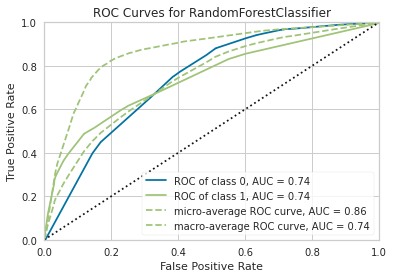

In [19]:
plot_model(tuned_rf, plot = 'auc')

In [20]:
%config InlineBackend.figure_format = 'svg'

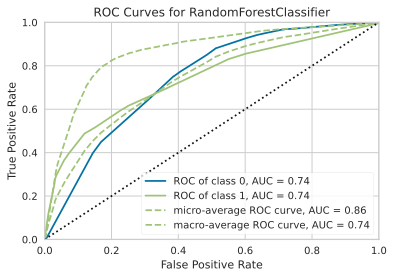

In [21]:
plot_model(tuned_rf, plot = 'auc')

### 10.2 Precision-Recall Curve

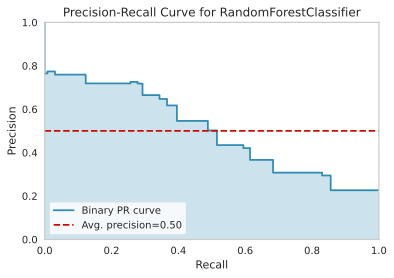

In [22]:
plot_model(tuned_rf, plot = 'pr')

### 10.3 Feature Importance Plot

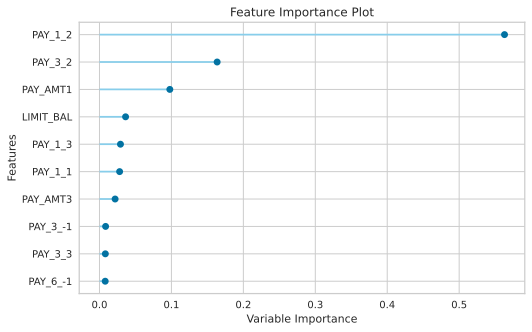

In [23]:
plot_model(tuned_rf, plot='feature')

### 10.4 Confusion Matrix

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


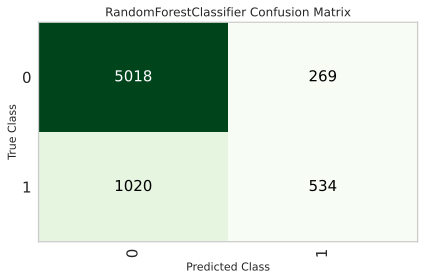

In [24]:
plot_model(tuned_rf, plot = 'confusion_matrix')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [25]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (6,841 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the `tuned_rf` variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [26]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8116,0.7407,0.3436,0.6650,0.4531,0.3530,0.3811


The accuracy on test/hold-out set is **`0.8116`** compared to **`0.8203`** achieved on the `tuned_rf` CV results (in section 9.3 above). This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 5% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using `create_model()`.)

# 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [27]:
final_rf = finalize_model(tuned_rf)

In [28]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


**Caution:** One final word of caution. Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use `final_rf` under `predict_model()` to compare the information grid with the one above in section 11. 

In [29]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8184,0.7526,0.3533,0.6985,0.4692,0.3736,0.4053


Notice how the AUC in `final_rf` has increased to **`0.7526`** from **`0.7407`**, even though the model is the same. This is because the `final_rf` variable has been trained on the complete dataset including the test/hold-out set.

# 13.0 Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 5% (1200 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [30]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8167,0.7768,0.3612,0.6463,0.4634,0.3634,0.3857


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column `default` available. To do that we will use `pycaret.utils` module. See example below:

In [31]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

0.8167

# 14.0 Saving the model

We have now finished the experiment by finalizing the `tuned_rf` model which is now stored in `final_rf` variable. We have also used the model stored in `final_rf` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [32]:
save_model(final_rf,'Final RF Model 11Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [33]:
saved_final_rf = load_model('Final RF Model 11Nov2020')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [34]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8167,0.7768,0.3612,0.6463,0.4634,0.3634,0.3857


In [35]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

In [36]:
from pycaret.utils import check_metric
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'Accuracy')

0.8167

# 16.0 Wrap-up / Next Steps?

This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model()`, `tune_model()`, `compare_models()`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries.

We have only covered the basics of `pycaret.classification`. In following tutorials we will go deeper into advanced pre-processing, ensembling, generalized stacking and other techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist.

See you at the next tutorial. Follow the link to __[Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__